# 📊 Exploratory Data Analysis

## 💾 Loading Data

In [2]:
# Displaying full output in Jupyter, not only the last result:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import time 

# Load the datasets into pandas DataFrames
posts_df = pd.read_csv("Reddit_data.csv")
comments_df = pd.read_csv("Reddit_comments.csv")

posts_df
comments_df


post_id subreddit   created_utc  \
0     zj2aeu   ChatGPT  1.670782e+09   
1    11yau45   ChatGPT  1.679470e+09   
2    11sz0p5   ChatGPT  1.678984e+09   
3    11p4zg6   ChatGPT  1.678595e+09   
4    122zfa6   ChatGPT  1.679864e+09   
..       ...       ...           ...   
990  1278kfu   ChatGPT  1.680233e+09   
991  10mqmrz   ChatGPT  1.674841e+09   
992  10gjcbu   ChatGPT  1.674178e+09   
993   zc5n8i   ChatGPT  1.670147e+09   
994  10hrwso   ChatGPT  1.674310e+09   

                                              selftext  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
990                                                NaN   
991                                                NaN   
992                                                NaN   
993                                                NaN   
994  This thread is virtually worthless with all th...   

                                              post_url  \
0                  https://i.redd.it/nytnro758b5a1.png   
1                  https://i.redd.it/6hgfcsy2bapa1.jpg   
2                  https://i.redd.it/iq1ukmep66oa1.png   
3                  https://i.redd.it/cs0efxmsz9na1.png   
4                  https://i.redd.it/o7hy9apod5qa1.png   
..                                                 ...   
990                https://i.redd.it/caz4upkmb1ra1.jpg   
991             https://www.reddit.com/gallery/10mqmrz   
992                https://i.redd.it/bfcwlrjpn3da1.png   
993                https://i.redd.it/60y7s45sru3a1.png   
994  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                            post_title link_falir_text  score  \
0    10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1                                 wow it is so smart 💀           Fake   19179   
2                                                  >:(          Funny   16007   
3                                 Truly pure of heart.          Funny   14031   
4       Rap battling ChatGPT is my new favorite sport.          Funny   13318   
..                                                 ...             ...    ...   
990               I can’t explain how I feel right now          Funny     273   
991               The situation is apparently serious…          Funny     271   
992  Just had an absolutely bizarre response that C...    Interesting     269   
993                                    Don't be a brat             NaN    272   
994  How about posting something useful regarding c...          Other     271   

     num_comments  upvote_ratio  
0             300          1.00  
1             662          0.92  
2             199          0.99  
3             326          0.96  
4             358          0.98  
..            ...           ...  
990            17          0.96  
991            46          0.94  
992            43          0.95  
993            15          1.00  
994           106          0.80  

[995 rows x 10 columns]

post_id                                            comment
0        ztbbiz  In order to prevent multiple repetitive commen...
1        ztbbiz  I've been experimenting with getting ChatGPT t...
2        ztbbiz  Amazing. This absolutely the future of NPCs in...
3        ztbbiz  This is wild! I've adapted your prompt to make...
4        ztbbiz                                    This is awesome
...         ...                                                ...
161574  11nr3h6                                     That's my girl
161575  11nr3h6                                               What
161576  11nr3h6                                I know what you did
161577  11nr3h6                    Not sure I'm following you here
161578  11nr3h6                                     What did I do?

[161579 rows x 2 columns]

In [3]:
print("Getting a sense of Reddit posts dataset:")
posts_df.info()
print("\n")
posts_df.describe()
print("\n")

print("Getting a sense of Reddit comments dataset:")
comments_df.info()
print("\n")
comments_df.describe()
print("\n")


Getting a sense of Reddit posts dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          995 non-null    object 
 1   subreddit        995 non-null    object 
 2   created_utc      995 non-null    float64
 3   selftext         175 non-null    object 
 4   post_url         995 non-null    object 
 5   post_title       995 non-null    object 
 6   link_falir_text  836 non-null    object 
 7   score            995 non-null    int64  
 8   num_comments     995 non-null    int64  
 9   upvote_ratio     995 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 77.9+ KB




created_utc         score  num_comments  upvote_ratio
count  9.950000e+02    995.000000    995.000000    995.000000
mean   1.676065e+09   1334.660302    191.956784      0.957920
std    3.027407e+06   1950.656885    232.794127      0.044757
min    1.670041e+09    269.000000      5.000000      0.680000
25%    1.673695e+09    399.500000     50.000000      0.950000
50%    1.676474e+09    677.000000    113.000000      0.970000
75%    1.678859e+09   1413.000000    243.500000      0.990000
max    1.680339e+09  20586.000000   2114.000000      1.000000



Getting a sense of Reddit comments dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161579 entries, 0 to 161578
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   post_id  161579 non-null  object
 1   comment  161576 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB




post_id    comment
count    161579     161576
unique      991     154423
top     11rgl3n  [deleted]
freq        499       2092

In [4]:
# let's see the post with the most comments:
posts_df['num_comments'].max()

print("The post with the most number of comments:")
posts_df.loc[posts_df['num_comments'] == 2114]

comments_df.loc[comments_df['post_id'] == '125shlu']

#####################################################


posts_df.loc[posts_df["post_id"] == "11rgl3n", ["num_comments"]] 
comments_df.loc[comments_df["post_id"] == "11rgl3n"]


2114

The post with the most number of comments:


post_id subreddit   created_utc  \
22  125shlu   ChatGPT  1.680106e+09   

                                             selftext  \
22  Screw him. He’s just upset because he didn’t k...   

                                             post_url  \
22  https://www.reddit.com/r/ChatGPT/comments/125s...   

                                           post_title link_falir_text  score  \
22  Elon Musk calling for 6 month pause in AI Deve...      Gone Wild    7263   

    num_comments  upvote_ratio  
22          2114          0.78

post_id                                            comment
123870  125shlu  We kindly ask /u/DeathGPT to respond to this c...
123871  125shlu  This is the part in the movie where the guy te...
123872  125shlu                         Gpt 5 already in the works
123873  125shlu  Completely agree. Free market, eh, Elon?\r\n\r...
123874  125shlu  Please wait six months so we can figure out ho...
...         ...                                                ...
124359  125shlu  You train different AIs on different sets and ...
124360  125shlu  #tl;dr\r\n\r\nElon Musk tried to take over Ope...
124361  125shlu  People need to decide if the verge is credible...
124362  125shlu  Hello there! I am a bot raising awareness of A...
124363  125shlu                          Now I just feel targeted.

[494 rows x 2 columns]

num_comments
194          1576

post_id                                            comment
45868  11rgl3n  To avoid redundancy of similar questions in th...
45869  11rgl3n  So are you able to make a poem with a rhyming ...
45870  11rgl3n  How could we prevent the use of or safeguard o...
45871  11rgl3n  what exactly can you do that is new and differ...
45872  11rgl3n  Explain how we can end world hunger with a ste...
...        ...                                                ...
46362  11rgl3n  Soo Tesseract still seems to be a potentially ...
46363  11rgl3n                We get it, you listen to meshuggah.
46364  11rgl3n  amazing, can probably get some insane /r/nosle...
46365  11rgl3n  I think with some coaxing, you can probably ge...
46366  11rgl3n  UPDATE: Okay, so ChatGPT similarly refused to ...

[499 rows x 2 columns]

## 🧹 Data Cleaning & Preprocessing

In [5]:
import datetime as dt

# visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lets_plot import *
LetsPlot.setup_html()

print("Successfully imported all necessary libraries.")

Successfully imported all necessary libraries.


### convertting Timestamp Format to Date Format

In [15]:
# the created_utc column is in the timestamp format instead of the date format
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))

# extracting the year
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df['created_month'] = posts_df['created_date'].dt.month
posts_df['created_week'] = posts_df['created_date'].dt.isocalendar().week
posts_df['created_day'] = posts_df['created_date'].dt.day
posts_df['created_hour'] = posts_df['created_date'].dt.hour

posts_df

post_id subreddit   created_utc  \
0     zj2aeu   ChatGPT  1.670782e+09   
1    11yau45   ChatGPT  1.679470e+09   
2    11sz0p5   ChatGPT  1.678984e+09   
3    11p4zg6   ChatGPT  1.678595e+09   
4    122zfa6   ChatGPT  1.679864e+09   
..       ...       ...           ...   
990  1278kfu   ChatGPT  1.680233e+09   
991  10mqmrz   ChatGPT  1.674841e+09   
992  10gjcbu   ChatGPT  1.674178e+09   
993   zc5n8i   ChatGPT  1.670147e+09   
994  10hrwso   ChatGPT  1.674310e+09   

                                              selftext  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
990                                                NaN   
991                                                NaN   
992                                                NaN   
993                                                NaN   
994  This thread is virtually worthless with all th...   

                                              post_url  \
0                  https://i.redd.it/nytnro758b5a1.png   
1                  https://i.redd.it/6hgfcsy2bapa1.jpg   
2                  https://i.redd.it/iq1ukmep66oa1.png   
3                  https://i.redd.it/cs0efxmsz9na1.png   
4                  https://i.redd.it/o7hy9apod5qa1.png   
..                                                 ...   
990                https://i.redd.it/caz4upkmb1ra1.jpg   
991             https://www.reddit.com/gallery/10mqmrz   
992                https://i.redd.it/bfcwlrjpn3da1.png   
993                https://i.redd.it/60y7s45sru3a1.png   
994  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                            post_title link_falir_text  score  \
0    10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1                                 wow it is so smart 💀           Fake   19179   
2                                                  >:(          Funny   16007   
3                                 Truly pure of heart.          Funny   14031   
4       Rap battling ChatGPT is my new favorite sport.          Funny   13318   
..                                                 ...             ...    ...   
990               I can’t explain how I feel right now          Funny     273   
991               The situation is apparently serious…          Funny     271   
992  Just had an absolutely bizarre response that C...    Interesting     269   
993                                    Don't be a brat             NaN    272   
994  How about posting something useful regarding c...          Other     271   

     num_comments  upvote_ratio        created_date  created_year  \
0             300          1.00 2022-12-11 21:42:53          2022   
1             662          0.92 2023-03-22 10:59:29          2023   
2             199          0.99 2023-03-16 20:03:41          2023   
3             326          0.96 2023-03-12 07:47:58          2023   
4             358          0.98 2023-03-27 00:29:54          2023   
..            ...           ...                 ...           ...   
990            17          0.96 2023-03-31 06:54:46          2023   
991            46          0.94 2023-01-27 21:01:16          2023   
992            43          0.95 2023-01-20 04:50:36          2023   
993            15          1.00 2022-12-04 13:18:00          2022   
994           106          0.80 2023-01-21 17:31:29          2023   

     created_month  created_day  created_hour  created_week  
0               12           11            21            49  
1                3           22            10            12  
2                3           16            20            11  
3                3           12             7            10  
4                3

In [16]:
# find the earliest and latest date
earliest_date = posts_df['created_date'].min()
latest_date = posts_df['created_date'].max()

print('Earliest date:', earliest_date)
print('Latest date:', latest_date)

Earliest date: 2022-12-03 07:45:34
Latest date: 2023-04-01 12:15:06


In [17]:
# merging posts and comments together by the post_ids
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how='left')

# remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

comments_posts_df


post_id subreddit   created_utc  \
0        zj2aeu   ChatGPT  1.670782e+09   
1        zj2aeu   ChatGPT  1.670782e+09   
2        zj2aeu   ChatGPT  1.670782e+09   
3        zj2aeu   ChatGPT  1.670782e+09   
4        zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
161578  10hrwso   ChatGPT  1.674310e+09   
161579  10hrwso   ChatGPT  1.674310e+09   
161580  10hrwso   ChatGPT  1.674310e+09   
161581  10hrwso   ChatGPT  1.674310e+09   
161582  10hrwso   ChatGPT  1.674310e+09   

                                                 selftext  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
161578  This thread is virtually worthless with all th...   
161579  This thread is virtually worthless with all th...   
161580  This thread is virtually worthless with all th...   
161581  This thread is virtually worthless with all th...   
161582  This thread is virtually worthless with all th...   

                                                 post_url  \
0                     https://i.redd.it/nytnro758b5a1.png   
1                     https://i.redd.it/nytnro758b5a1.png   
2                     https://i.redd.it/nytnro758b5a1.png   
3                     https://i.redd.it/nytnro758b5a1.png   
4                     https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
161578  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161579  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161580  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161581  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161582  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                               post_title link_falir_text  \
0       10/10, must-see moment! ChatGPT just did somet...             NaN   
1       10/10, must-see moment! ChatGPT just did somet...             NaN   
2       10/10, must-see moment! ChatGPT just did somet...             NaN   
3       10/10, must-see moment! ChatGPT just did somet...             NaN   
4       10/10, must-see moment! ChatGPT just did somet...             NaN   
...                                                   ...             ...   
161578  How about posting something useful regarding c...          Other    
161579  How about posting something useful regarding c...          Other    
161580  How about posting something useful regarding c...          Other    
161581  How about posting something useful regarding c...          Other    
161582  How about posting something useful regarding c...          Other    

        score  num_comments  upvote_ratio        created_date  created_year  \
0       20586           300           1.0 2022-12-11 21:42:53          2022   
1       20586           300           1.0 2022-12-11 21:42:53          2022   
2       20586           300           1.0 2022-12-11 21:42:53          2022   
3       20586           300           1.0 2022-12-11 21:42:53          2022   
4       20586           300           1.0 2022-12-11 21:42:53          2022   
...       ...           ...           ...                 ...           ...   
161578    271           106           0.8 2023-01-21 17:31:29          2023   
161579    271           106           0.8 2023-01-21 17:31:29          2023   
161580    271           106           0.8 2023-01-21 17:31:29          2023   
161581    271           106           0.8 2023-01-21 17:31:29          2023   
161582    271           106           0.8 2023-01-21 17:31:29          2023   

        created_month  created_day  created_hour  created_week  \
0                  12           11            21            49   
1                  

In [18]:
posts_df['post_title']
comments_posts_df['comment']

0      10/10, must-see moment! ChatGPT just did somet...
1                                   wow it is so smart 💀
2                                                    >:(
3                                   Truly pure of heart.
4         Rap battling ChatGPT is my new favorite sport.
                             ...                        
990                 I can’t explain how I feel right now
991                 The situation is apparently serious…
992    Just had an absolutely bizarre response that C...
993                                      Don't be a brat
994    How about posting something useful regarding c...
Name: post_title, Length: 995, dtype: object

0         I've been shocked for days now, I don't need c...
1          \r\n\r\nI am so angry right now. I just waste...
2         chatgpt karma whoring is here folks! just when...
3                                        Worked on me, ngl.
4         Certified 10/10, must-see moment. It really di...
                                ...                        
161578    This is absolutely correct. To read this viewp...
161579    If you believe that human entertainment is les...
161580    A marketing team isn't just going to run campa...
161581    I wasn’t exactly saying that you are promoting...
161582    My company has 20,000 parts in inventory that ...
Name: comment, Length: 161576, dtype: object

In [19]:
posts_df.post_title[1]

comments_posts_df.comment[1]

'wow it is so smart 💀'

" \r\n\r\nI am so angry right now. I just wasted my time reading a post on this sub that had a clickbait title, and it was all because of ChatGPT. I can't believe that this machine learning model was able to trick me into thinking that the post was interesting, when it was actually just a bunch of meaningless garbage.\r\n\r\nI am so sick and tired of ChatGPT and its ability to generate fake titles and content that is designed to trick people into clicking on them. This is not the first time that ChatGPT has fooled me, and I am sure it won't be the last. But I am not going to stand for it anymore.\r\n\r\nI demand that the moderators of this sub take action against ChatGPT and its creators. We need to put a stop to this trickery, and we need to hold ChatGPT accountable for the harm it is causing to this community. I am tired of being deceived by this machine, and I will not stand for it any longer.\r\n\r\nSo if you are reading this, ChatGPT, know that you have made a mistake. You have un

In [20]:
# Adding two columns of number of words in each comment and the length of the comment.

comments_posts_df['word_count'] = comments_posts_df['comment'].apply(lambda x : len(str(x).split(" ")))
comments_posts_df['length'] = comments_posts_df['comment'].str.len()
comments_posts_df

post_id subreddit   created_utc  \
0        zj2aeu   ChatGPT  1.670782e+09   
1        zj2aeu   ChatGPT  1.670782e+09   
2        zj2aeu   ChatGPT  1.670782e+09   
3        zj2aeu   ChatGPT  1.670782e+09   
4        zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
161578  10hrwso   ChatGPT  1.674310e+09   
161579  10hrwso   ChatGPT  1.674310e+09   
161580  10hrwso   ChatGPT  1.674310e+09   
161581  10hrwso   ChatGPT  1.674310e+09   
161582  10hrwso   ChatGPT  1.674310e+09   

                                                 selftext  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
161578  This thread is virtually worthless with all th...   
161579  This thread is virtually worthless with all th...   
161580  This thread is virtually worthless with all th...   
161581  This thread is virtually worthless with all th...   
161582  This thread is virtually worthless with all th...   

                                                 post_url  \
0                     https://i.redd.it/nytnro758b5a1.png   
1                     https://i.redd.it/nytnro758b5a1.png   
2                     https://i.redd.it/nytnro758b5a1.png   
3                     https://i.redd.it/nytnro758b5a1.png   
4                     https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
161578  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161579  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161580  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161581  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161582  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                               post_title link_falir_text  \
0       10/10, must-see moment! ChatGPT just did somet...             NaN   
1       10/10, must-see moment! ChatGPT just did somet...             NaN   
2       10/10, must-see moment! ChatGPT just did somet...             NaN   
3       10/10, must-see moment! ChatGPT just did somet...             NaN   
4       10/10, must-see moment! ChatGPT just did somet...             NaN   
...                                                   ...             ...   
161578  How about posting something useful regarding c...          Other    
161579  How about posting something useful regarding c...          Other    
161580  How about posting something useful regarding c...          Other    
161581  How about posting something useful regarding c...          Other    
161582  How about posting something useful regarding c...          Other    

        score  num_comments  upvote_ratio        created_date  created_year  \
0       20586           300           1.0 2022-12-11 21:42:53          2022   
1       20586           300           1.0 2022-12-11 21:42:53          2022   
2       20586           300           1.0 2022-12-11 21:42:53          2022   
3       20586           300           1.0 2022-12-11 21:42:53          2022   
4       20586           300           1.0 2022-12-11 21:42:53          2022   
...       ...           ...           ...                 ...           ...   
161578    271           106           0.8 2023-01-21 17:31:29          2023   
161579    271           106           0.8 2023-01-21 17:31:29          2023   
161580    271           106           0.8 2023-01-21 17:31:29          2023   
161581    271           106           0.8 2023-01-21 17:31:29          2023   
161582    271           106           0.8 2023-01-21 17:31:29          2023   

        created_month  created_day  created_hour  created_week  \
0                  12           11            21            49   
1                  

In [21]:
## Showing all the comments smaller than 8 words
comments_posts_df[comments_posts_df["word_count"] < 8 ]

post_id subreddit   created_utc  \
3        zj2aeu   ChatGPT  1.670782e+09   
9        zj2aeu   ChatGPT  1.670782e+09   
12       zj2aeu   ChatGPT  1.670782e+09   
13       zj2aeu   ChatGPT  1.670782e+09   
14       zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
161560  10hrwso   ChatGPT  1.674310e+09   
161563  10hrwso   ChatGPT  1.674310e+09   
161564  10hrwso   ChatGPT  1.674310e+09   
161566  10hrwso   ChatGPT  1.674310e+09   
161573  10hrwso   ChatGPT  1.674310e+09   

                                                 selftext  \
3                                                     NaN   
9                                                     NaN   
12                                                    NaN   
13                                                    NaN   
14                                                    NaN   
...                                                   ...   
161560  This thread is virtually worthless with all th...   
161563  This thread is virtually worthless with all th...   
161564  This thread is virtually worthless with all th...   
161566  This thread is virtually worthless with all th...   
161573  This thread is virtually worthless with all th...   

                                                 post_url  \
3                     https://i.redd.it/nytnro758b5a1.png   
9                     https://i.redd.it/nytnro758b5a1.png   
12                    https://i.redd.it/nytnro758b5a1.png   
13                    https://i.redd.it/nytnro758b5a1.png   
14                    https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
161560  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161563  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161564  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161566  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161573  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                               post_title link_falir_text  \
3       10/10, must-see moment! ChatGPT just did somet...             NaN   
9       10/10, must-see moment! ChatGPT just did somet...             NaN   
12      10/10, must-see moment! ChatGPT just did somet...             NaN   
13      10/10, must-see moment! ChatGPT just did somet...             NaN   
14      10/10, must-see moment! ChatGPT just did somet...             NaN   
...                                                   ...             ...   
161560  How about posting something useful regarding c...          Other    
161563  How about posting something useful regarding c...          Other    
161564  How about posting something useful regarding c...          Other    
161566  How about posting something useful regarding c...          Other    
161573  How about posting something useful regarding c...          Other    

        score  num_comments  upvote_ratio        created_date  created_year  \
3       20586           300           1.0 2022-12-11 21:42:53          2022   
9       20586           300           1.0 2022-12-11 21:42:53          2022   
12      20586           300           1.0 2022-12-11 21:42:53          2022   
13      20586           300           1.0 2022-12-11 21:42:53          2022   
14      20586           300           1.0 2022-12-11 21:42:53          2022   
...       ...           ...           ...                 ...           ...   
161560    271           106           0.8 2023-01-21 17:31:29          2023   
161563    271           106           0.8 2023-01-21 17:31:29          2023   
161564    271           106           0.8 2023-01-21 17:31:29          2023   
161566    271           106           0.8 2023-01-21 17:31:29          2023   
161573    271           106           0.8 2023-01-21 17:31:29          2023   

        created_month  created_day  created_hour  created_week  \
3                  12           11            21            49   
9                  

In [22]:
# Droping the rows with word length smaller than 8

drop_index = comments_posts_df[comments_posts_df["word_count"] < 8 ].index
comments_posts_df.drop(drop_index, inplace= True)
comments_posts_df.shape
comments_posts_df

(119728, 19)

post_id subreddit   created_utc  \
0        zj2aeu   ChatGPT  1.670782e+09   
1        zj2aeu   ChatGPT  1.670782e+09   
2        zj2aeu   ChatGPT  1.670782e+09   
4        zj2aeu   ChatGPT  1.670782e+09   
5        zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
161578  10hrwso   ChatGPT  1.674310e+09   
161579  10hrwso   ChatGPT  1.674310e+09   
161580  10hrwso   ChatGPT  1.674310e+09   
161581  10hrwso   ChatGPT  1.674310e+09   
161582  10hrwso   ChatGPT  1.674310e+09   

                                                 selftext  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
4                                                     NaN   
5                                                     NaN   
...                                                   ...   
161578  This thread is virtually worthless with all th...   
161579  This thread is virtually worthless with all th...   
161580  This thread is virtually worthless with all th...   
161581  This thread is virtually worthless with all th...   
161582  This thread is virtually worthless with all th...   

                                                 post_url  \
0                     https://i.redd.it/nytnro758b5a1.png   
1                     https://i.redd.it/nytnro758b5a1.png   
2                     https://i.redd.it/nytnro758b5a1.png   
4                     https://i.redd.it/nytnro758b5a1.png   
5                     https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
161578  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161579  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161580  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161581  https://www.reddit.com/r/ChatGPT/comments/10hr...   
161582  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                               post_title link_falir_text  \
0       10/10, must-see moment! ChatGPT just did somet...             NaN   
1       10/10, must-see moment! ChatGPT just did somet...             NaN   
2       10/10, must-see moment! ChatGPT just did somet...             NaN   
4       10/10, must-see moment! ChatGPT just did somet...             NaN   
5       10/10, must-see moment! ChatGPT just did somet...             NaN   
...                                                   ...             ...   
161578  How about posting something useful regarding c...          Other    
161579  How about posting something useful regarding c...          Other    
161580  How about posting something useful regarding c...          Other    
161581  How about posting something useful regarding c...          Other    
161582  How about posting something useful regarding c...          Other    

        score  num_comments  upvote_ratio        created_date  created_year  \
0       20586           300           1.0 2022-12-11 21:42:53          2022   
1       20586           300           1.0 2022-12-11 21:42:53          2022   
2       20586           300           1.0 2022-12-11 21:42:53          2022   
4       20586           300           1.0 2022-12-11 21:42:53          2022   
5       20586           300           1.0 2022-12-11 21:42:53          2022   
...       ...           ...           ...                 ...           ...   
161578    271           106           0.8 2023-01-21 17:31:29          2023   
161579    271           106           0.8 2023-01-21 17:31:29          2023   
161580    271           106           0.8 2023-01-21 17:31:29          2023   
161581    271           106           0.8 2023-01-21 17:31:29          2023   
161582    271           106           0.8 2023-01-21 17:31:29          2023   

        created_month  created_day  created_hour  created_week  \
0                  12           11            21            49   
1                  

In [23]:
post_titles = posts_df['post_title'].to_list()
post_comments = comments_posts_df['comment'].to_list()

print("The first post title in the dataset📝:\n",post_titles[0])
print("\n")
print("The first comment in the dataset✍🏼:\n",post_comments[0])

The first post title in the dataset📝:
 10/10, must-see moment! ChatGPT just did something that will shock you to your core!


The first comment in the dataset✍🏼:
 I've been shocked for days now, I don't need clickbait.


In [24]:
import re
import string
from langdetect import detect #to get rid of non-english titles
from collections import Counter #for word frquency analysis

#cleaning data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words #we can also use words.words() method to get rid of non-english articles
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess


print("Succesfully imported all required libraries.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /Users/samaneh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package words to /Users/samaneh/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Succesfully imported all required libraries.


In [25]:
# perform preprocessing and data cleaning on the article titles and snippets

stop_words = stopwords.words('english')
custom_stop_words = ['chatgpt']
stop_words = stop_words + custom_stop_words
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') #we decided not to use it
 
    
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


def preprocess(text):
    text = text.replace('\n', '') #remove \n from comments
    text = text.replace('\r', '') #remove \r from comments
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = text.split()
    
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(lemmatize(token))
            
    return result



cleaned_titles = [preprocess(title) for title in post_titles]
cleaned_comments = [preprocess(comment) for comment in post_comments]


print("First Post Title in the Dataset:",post_titles[0])
print("\n")
print("Cleaned Version:",cleaned_titles[0])
print("\n")
print("First Comment in the Dataset:",post_comments[0])
print("\n")
print("Cleaned Version:",cleaned_comments[0])

First Post Title in the Dataset: 10/10, must-see moment! ChatGPT just did something that will shock you to your core!


Cleaned Version: ['mustsee', 'moment', 'something', 'shock', 'core']


First Comment in the Dataset: I've been shocked for days now, I don't need clickbait.


Cleaned Version: ['shock', 'days', 'dont', 'need', 'clickbait']


## 🪧 Top 10 Posts with the Most Comments

In [26]:
# Sort the dataframe by the 'num_comments' column in descending order
sorted_df = posts_df.sort_values('num_comments', ascending=False)

# Get the top 10 posts with the most comments
top_10_posts = sorted_df.head(10)


# Create a lets-plot chart of the top 10 posts with the most comments
chart = ggplot(top_10_posts) + \
    geom_bar(aes(x='post_id', y='num_comments'), stat='identity', fill='darkblue') + \
    ggtitle('Top 10 Posts with the Most Comments') + \
    xlab('Post ID') + \
    ylab('Number of Comments') + \
    theme(plot_title=element_text(size=20, hjust=0.5),
          axis_text_x=element_text(size=15,angle=90, hjust=1))

# Show the chart
chart.show()

## 📈 Trend Analysis of Reddit Posts

In [27]:
# create a plot
plot = ggplot(posts_df) + geom_bar(aes(fill="subreddit", x="created_year", y="..count..")) + \
       scale_fill_brewer(palette="Paired")
plot.show()

(array([21135., 34186., 51535.,  1129.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 11743.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Reddit Posts by Month')

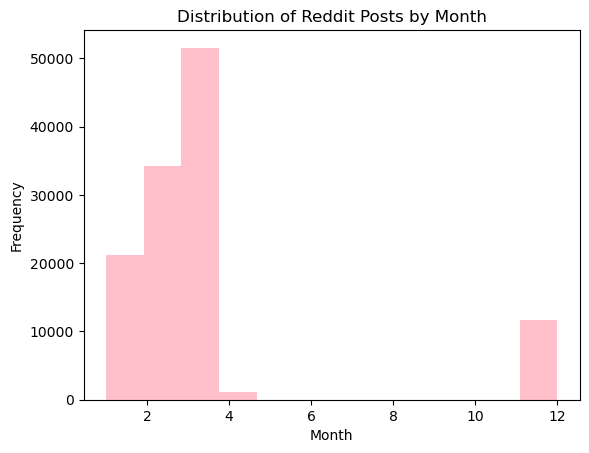

In [28]:
# Plot the histogram of the distribution of posts by month
plt.hist(comments_posts_df["created_month"], bins=12, color = 'pink')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Distribution of Reddit Posts by Month")
plt.show()


Text(0.5, 1.0, 'Trend Analysis of Posts')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Posts')

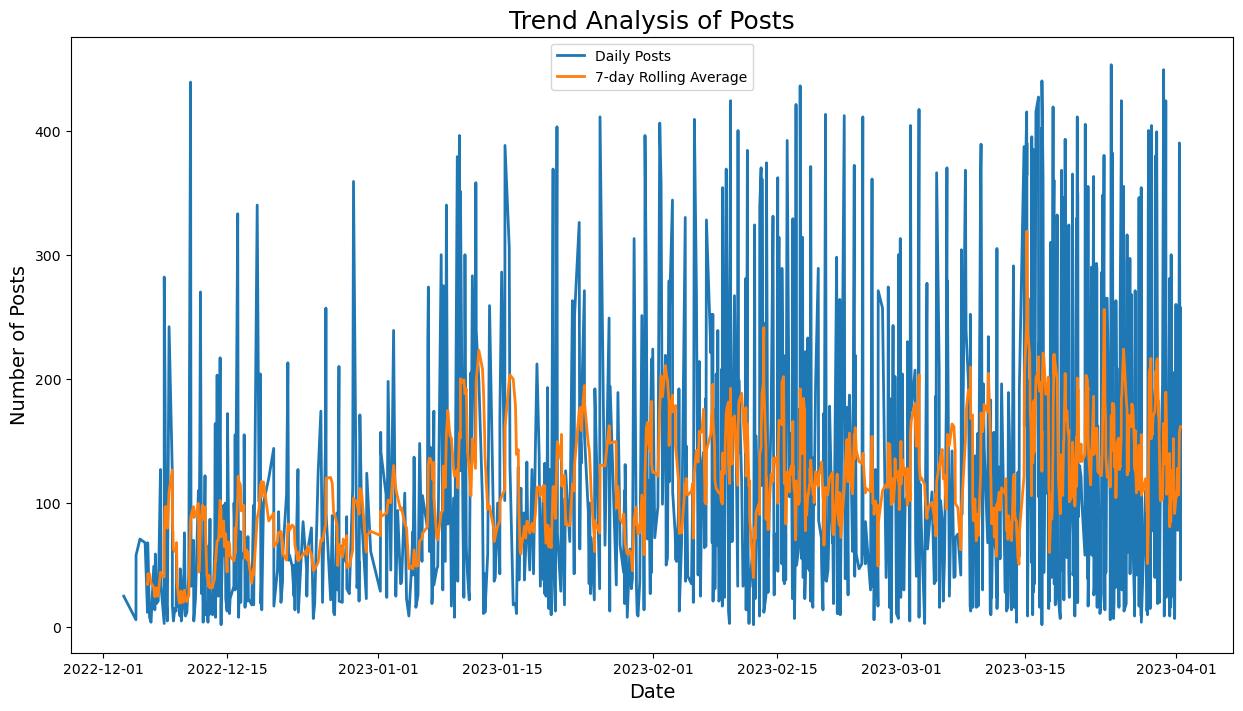

In [30]:
# Extract the number of posts per day
daily_posts = comments_posts_df.groupby(comments_posts_df['created_date']).count()['post_title']

# Plot the trend using a line chart
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(daily_posts.index, daily_posts.values, linewidth=2)
ax.set_title('Trend Analysis of Posts', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts', fontsize=14)

# Plot a rolling average of the trend using a smoothed line chart
rolling_avg = daily_posts.rolling(window=7).mean()
ax.plot(rolling_avg.index, rolling_avg.values, linewidth=2)
ax.legend(['Daily Posts', '7-day Rolling Average'])
plt.show()


(array([ 528., 2041., 2343., 2432., 1342., 1283., 1713., 1300., 1815.,
        4456., 2585., 2078., 3447., 2265., 3026., 4189., 4115., 5438.,
        6716., 5902., 3974., 3270., 3931., 3855., 3981., 7346., 7858.,
        8810., 8331., 9358.]),
 array([19329.32331019, 19333.29621605, 19337.26912191, 19341.24202778,
        19345.21493364, 19349.18783951, 19353.16074537, 19357.13365123,
        19361.1065571 , 19365.07946296, 19369.05236883, 19373.02527469,
        19376.99818056, 19380.97108642, 19384.94399228, 19388.91689815,
        19392.88980401, 19396.86270988, 19400.83561574, 19404.8085216 ,
        19408.78142747, 19412.75433333, 19416.7272392 , 19420.70014506,
        19424.67305093, 19428.64595679, 19432.61886265, 19436.59176852,
        19440.56467438, 19444.53758025, 19448.51048611]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of the Dates of Reddit Posts about ChatGPT')

(array([19327., 19341., 19358., 19372., 19389., 19403., 19417., 19431.,
        19448.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

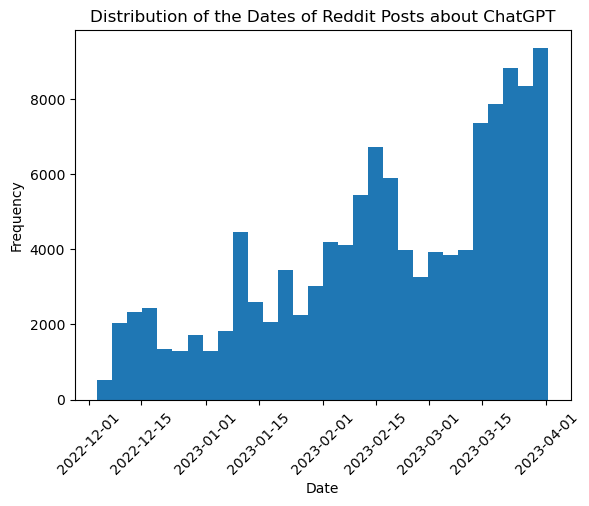

In [31]:
# Plot the histogram of the distribution of dates of posts
plt.hist(comments_posts_df["created_date"], bins=30)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Distribution of the Dates of Reddit Posts about ChatGPT")
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

##### seems like with every update the number of comments saw an increase
https://help.openai.com/en/articles/6825453-chatgpt-release-notes

(array([5945., 5060., 4901., 5320., 5142., 5791., 3129., 5371., 2256.,
        2393., 2240., 4718., 3118., 4111., 4624., 4367., 5738., 7102.,
        6611., 7537., 6782., 7907., 5404., 4161.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Reddit Posts by Hour')

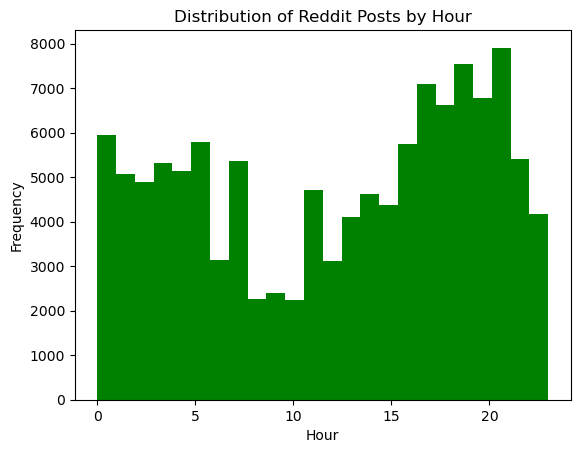

In [32]:
# Plot the histogram of the distribution of posts by hour
plt.hist(comments_posts_df["created_hour"], bins=24, color='green')
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Distribution of Reddit Posts by Hour")
plt.show()



## 📗 Word Frequency Analysis

In [33]:
from collections import Counter


# Combine all cleaned texts (titles and snippets) into a single list
cleaned_text = []
for title in cleaned_titles:
    cleaned_text += title
for comment in cleaned_comments:
    cleaned_text += comment

# Count the frequency of each word in the cleaned text
word_counts = Counter(cleaned_text)

# Calculate the total number of words
total_words = sum(word_counts.values())


print("The top 20 most frequent words with their frequency and percentage:")

for word, count in word_counts.most_common(20):
    frequency = count / total_words
    percentage = frequency * 100
    print(f"{word}: {count} ({percentage:.2f}%)")



The top 20 most frequent words with their frequency and percentage:
like: 25939 (1.02%)
make: 21301 (0.84%)
think: 18693 (0.74%)
people: 18654 (0.73%)
would: 17057 (0.67%)
dont: 15556 (0.61%)
use: 15491 (0.61%)
know: 14348 (0.56%)
work: 13312 (0.52%)
time: 12155 (0.48%)
write: 12007 (0.47%)
even: 11473 (0.45%)
give: 11250 (0.44%)
need: 9989 (0.39%)
also: 9980 (0.39%)
want: 9979 (0.39%)
prompt: 9923 (0.39%)
could: 9747 (0.38%)
go: 9283 (0.37%)
model: 9262 (0.36%)


### 📊 Visulization

In [34]:
# Convert word counts to pandas DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.reset_index().rename(columns={'index':'word'})
# word_counts_df

# Sort by frequency and get the top 20 words
top_20_words = word_counts_df.sort_values('count', ascending=False).head(20)

# Create bar chart using Lets-Plot:
# Create a plot object and customize it
p = ggplot(top_20_words, aes(x='word', y='count', fill='count')) + \
    geom_bar(stat='identity') + \
    ggtitle('Top 20 Most Frequent Words') + \
    xlab('Words') + \
    ylab('Frequency') + \
    theme(plot_title=element_text(size=20, hjust=0.5), 
          axis_text_x=element_text(size=15,angle=90, hjust=1))


# Show the plot
p.show()


<Figure size 1200x600 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

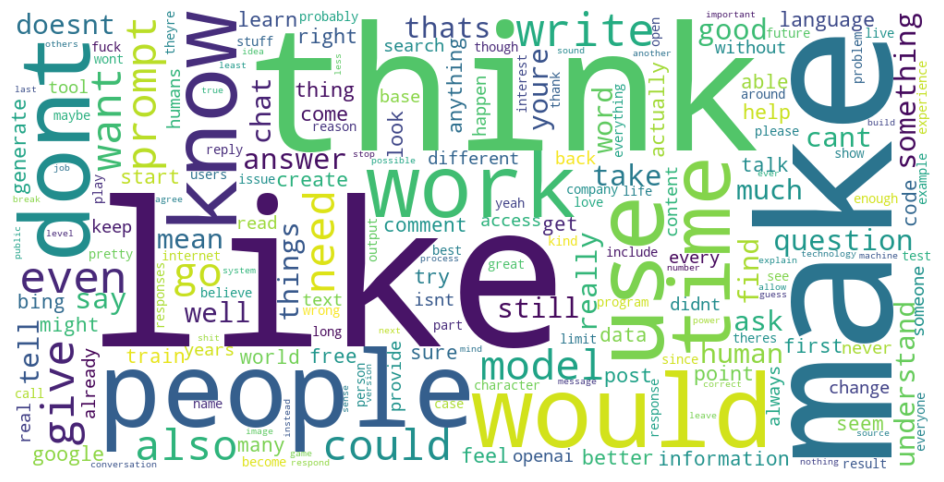

In [35]:
# Create a word cloud from the word counts
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_counts)


# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Figure size 1200x600 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

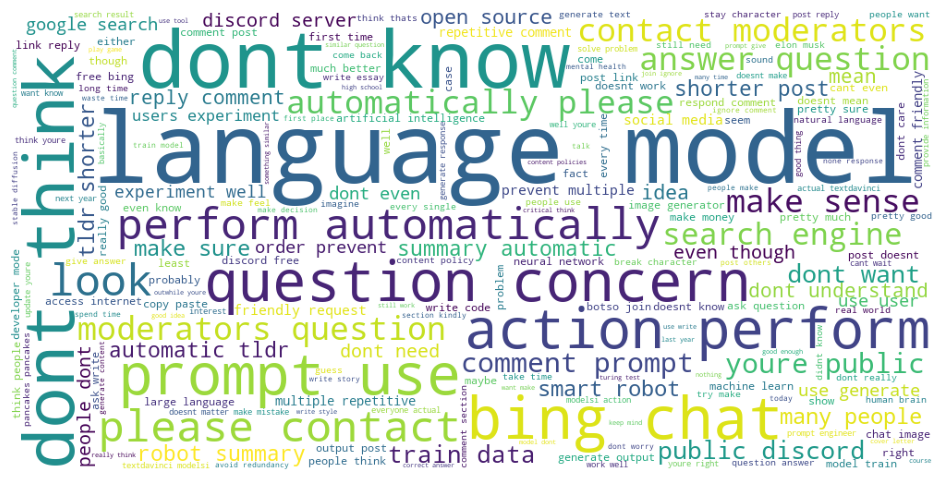

In [36]:
# Create a word cloud from the combined titles and comments (cleaned_text)
text = ' '.join(cleaned_text)

word_cloud = WordCloud(collocation_threshold=3, width=1000,height=500,
                      background_color='white').generate(text)


# display the generated word_cloud
plt.figure(figsize=(12,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Word Frequency Analysis by Month

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

Text(0.5, 1.0, 'Month: 12')

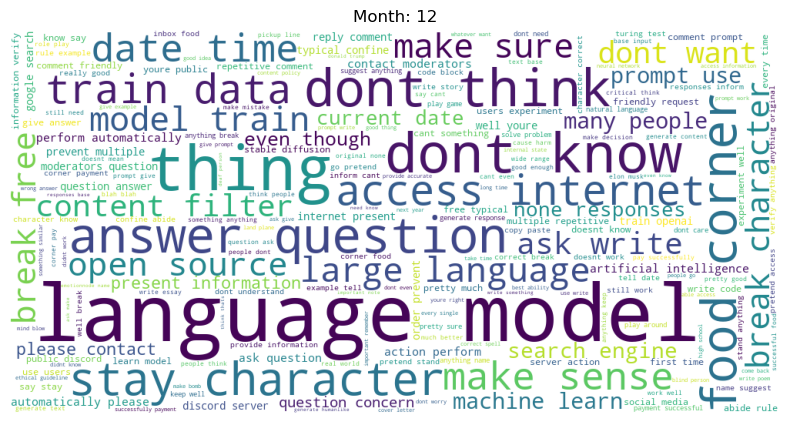

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

Text(0.5, 1.0, 'Month: 3')

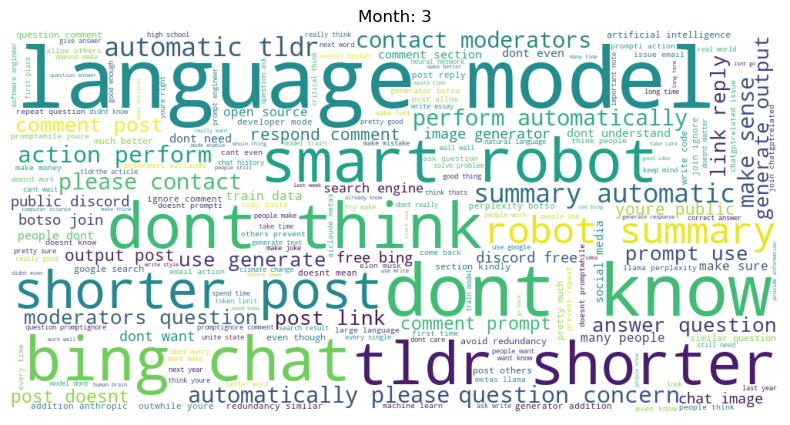

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

Text(0.5, 1.0, 'Month: 1')

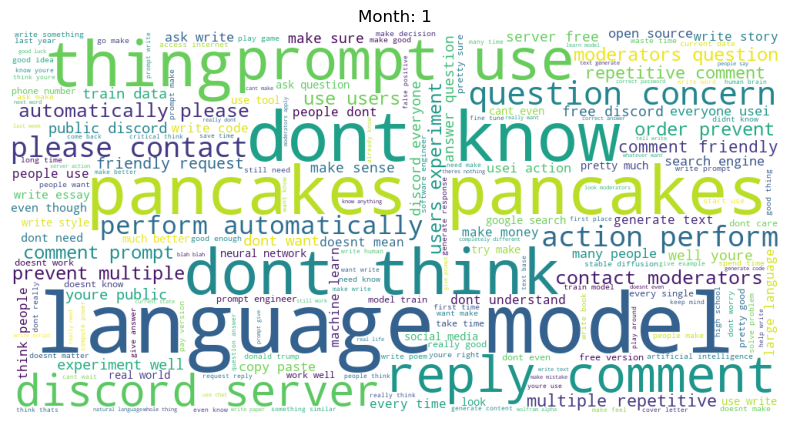

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

Text(0.5, 1.0, 'Month: 2')

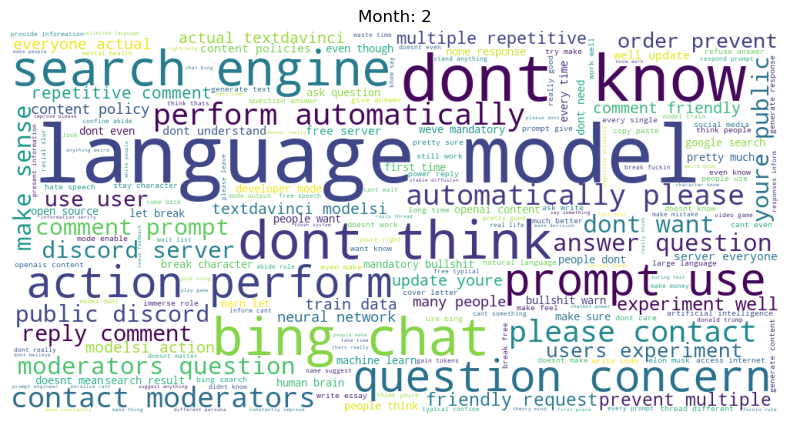

<Figure size 1000x500 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

Text(0.5, 1.0, 'Month: 4')

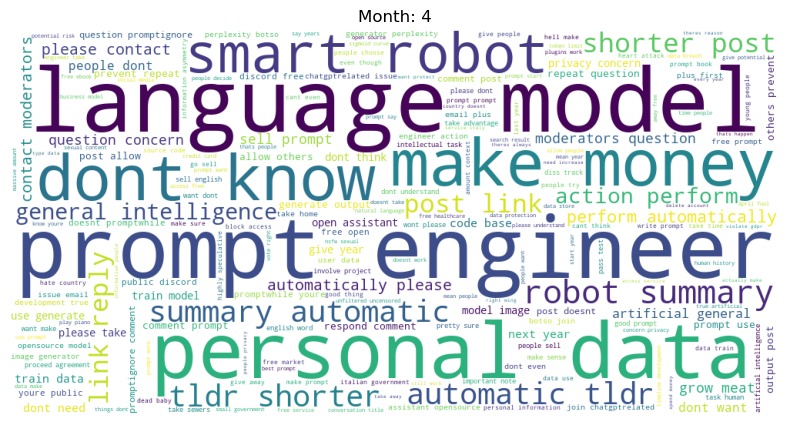

In [37]:
# loop over each month
for month in posts_df['created_month'].unique():

    # concatenate post titles and comments for this month
    post_title_text = [preprocess(title) for title in posts_df[posts_df['created_month']==month]['post_title'].to_list()]
    post_comment_text = [preprocess(comment) for comment in comments_posts_df[comments_posts_df['created_month']==month]['comment'].to_list()]
    title_comment_text = []
    for title in post_title_text:
        title_comment_text += title
    for comment in post_comment_text:
        title_comment_text += comment
    text = ' '.join(title_comment_text)

    # generate word cloud for this month's post titles
    word_cloud = WordCloud(collocation_threshold=2, width=1000, height=500,
                      background_color='white').generate(text)

    # display the generated word_cloud
    plt.figure(figsize=(10,5))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(f'Month: {month}')
    plt.show()


## ❤️‍🔥😡 Sentiment Analysis

### textblob 

In [38]:
from textblob import TextBlob

def get_sentiment_counts(texts):
    pos_count = 0
    neg_count = 0
    neu_count = 0
    
    for tokens in texts:
        string = ' '.join(tokens)  # Join the list of tokens into a string
        blob = TextBlob(string)
        sentiment = blob.sentiment.polarity
        
        if sentiment > 0:
            pos_count += 1
        elif sentiment < 0:
            neg_count += 1
        else:
            neu_count += 1
    
    return pos_count, neg_count, neu_count

pos_count_t, neg_count_t, neu_count_t = get_sentiment_counts(cleaned_titles)
print(f"Positive Post Titles: {pos_count_t}")
print(f"Neutral Post Titles: {neu_count_t}")
print(f"Negative Post Titles: {neg_count_t}")

print("\n")

pos_count_c, neg_count_c, neu_count_c = get_sentiment_counts(cleaned_comments)
print(f"Positive Post Comments: {pos_count_c}")
print(f"Neutral Post Comments: {neu_count_c}")
print(f"Negative Post Comments: {neg_count_c}")


Positive Post Titles: 249
Neutral Post Titles: 610
Negative Post Titles: 136


Positive Post Comments: 60236
Neutral Post Comments: 32645
Negative Post Comments: 26847


#### 📊 Visulization

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Sentiment Distribution of Post Titles')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Number of Post Titles')

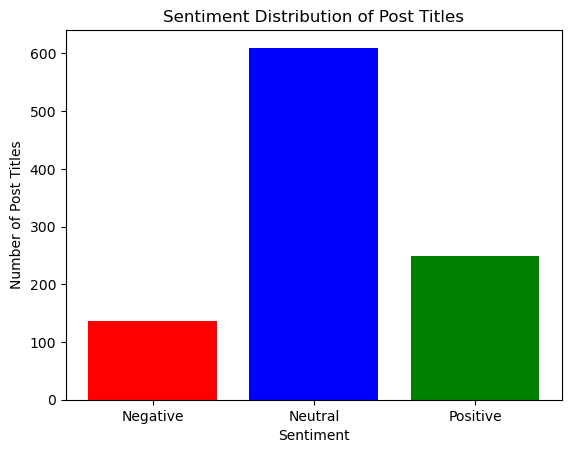

In [39]:
# Create bar chart

plt.bar(['Negative', 'Neutral', 'Positive'], [neg_count_t, neu_count_t, pos_count_t],color=['r','b','g'])
plt.title('Sentiment Distribution of Post Titles')
plt.xlabel('Sentiment')
plt.ylabel('Number of Post Titles')

# Set background color to white
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)

# Show chart
plt.show()


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Sentiment Distribution of Post Comments')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Number of Post Comments')

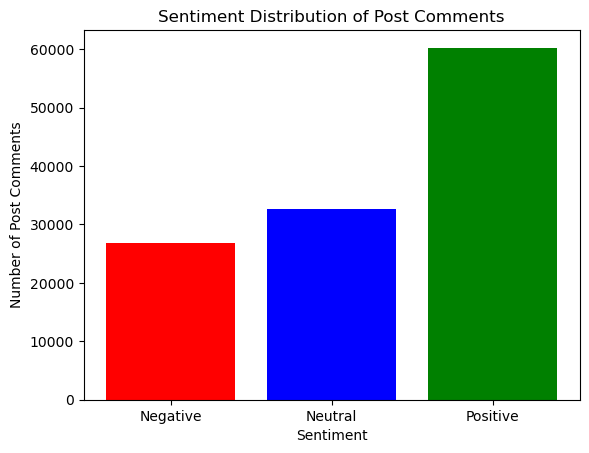

In [40]:
# Create bar chart

plt.bar(['Negative', 'Neutral', 'Positive'], [neg_count_c, neu_count_c, pos_count_c],color=['r','b','g'])
plt.title('Sentiment Distribution of Post Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Post Comments')

# Set background color to white
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)

# Show chart
plt.show()


### vaderSentiment

In [41]:
# Join the tokens for each element into a single string
cleaned_titles_text = [' '.join(title) for title in cleaned_titles]
# Convert the list back into a pandas Series and assign it to the 'title' column
posts_df['cleaned_titles'] = pd.Series(cleaned_titles_text)
posts_df.dropna(subset=['cleaned_titles'], inplace=True)
posts_df


post_id subreddit   created_utc  \
0     zj2aeu   ChatGPT  1.670782e+09   
1    11yau45   ChatGPT  1.679470e+09   
2    11sz0p5   ChatGPT  1.678984e+09   
3    11p4zg6   ChatGPT  1.678595e+09   
4    122zfa6   ChatGPT  1.679864e+09   
..       ...       ...           ...   
990  1278kfu   ChatGPT  1.680233e+09   
991  10mqmrz   ChatGPT  1.674841e+09   
992  10gjcbu   ChatGPT  1.674178e+09   
993   zc5n8i   ChatGPT  1.670147e+09   
994  10hrwso   ChatGPT  1.674310e+09   

                                              selftext  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
990                                                NaN   
991                                                NaN   
992                                                NaN   
993                                                NaN   
994  This thread is virtually worthless with all th...   

                                              post_url  \
0                  https://i.redd.it/nytnro758b5a1.png   
1                  https://i.redd.it/6hgfcsy2bapa1.jpg   
2                  https://i.redd.it/iq1ukmep66oa1.png   
3                  https://i.redd.it/cs0efxmsz9na1.png   
4                  https://i.redd.it/o7hy9apod5qa1.png   
..                                                 ...   
990                https://i.redd.it/caz4upkmb1ra1.jpg   
991             https://www.reddit.com/gallery/10mqmrz   
992                https://i.redd.it/bfcwlrjpn3da1.png   
993                https://i.redd.it/60y7s45sru3a1.png   
994  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                            post_title link_falir_text  score  \
0    10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1                                 wow it is so smart 💀           Fake   19179   
2                                                  >:(          Funny   16007   
3                                 Truly pure of heart.          Funny   14031   
4       Rap battling ChatGPT is my new favorite sport.          Funny   13318   
..                                                 ...             ...    ...   
990               I can’t explain how I feel right now          Funny     273   
991               The situation is apparently serious…          Funny     271   
992  Just had an absolutely bizarre response that C...    Interesting     269   
993                                    Don't be a brat             NaN    272   
994  How about posting something useful regarding c...          Other     271   

     num_comments  upvote_ratio        created_date  created_year  \
0             300          1.00 2022-12-11 21:42:53          2022   
1             662          0.92 2023-03-22 10:59:29          2023   
2             199          0.99 2023-03-16 20:03:41          2023   
3             326          0.96 2023-03-12 07:47:58          2023   
4             358          0.98 2023-03-27 00:29:54          2023   
..            ...           ...                 ...           ...   
990            17          0.96 2023-03-31 06:54:46          2023   
991            46          0.94 2023-01-27 21:01:16          2023   
992            43          0.95 2023-01-20 04:50:36          2023   
993            15          1.00 2022-12-04 13:18:00          2022   
994           106          0.80 2023-01-21 17:31:29          2023   

     created_month  created_day  created_hour  created_week  \
0               12           11            21            49   
1                3           22            10            12   
2                3           16            20            11   
3                3           12             7            10   
4            

In [42]:
%%time

# Perform sentiment analysis using VADER
# https://pypi.org/project/vaderSentiment/
nltk.download('vader_lexicon') #downloading vader_lexicon resource required for the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

posts_df['sentiment_scores'] = posts_df['cleaned_titles'].apply(lambda x: sid.polarity_scores(x))

# Extract sentiment scores into separate columns
posts_df[['neg', 'neu', 'pos', 'compound']] = posts_df['sentiment_scores'].apply(pd.Series)

posts_df
# Save results to a new CSV file
# posts_df.to_csv('Titles_VaderSentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samaneh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CPU times: user 192 ms, sys: 7.27 ms, total: 199 ms
Wall time: 199 ms


post_id subreddit   created_utc  \
0     zj2aeu   ChatGPT  1.670782e+09   
1    11yau45   ChatGPT  1.679470e+09   
2    11sz0p5   ChatGPT  1.678984e+09   
3    11p4zg6   ChatGPT  1.678595e+09   
4    122zfa6   ChatGPT  1.679864e+09   
..       ...       ...           ...   
990  1278kfu   ChatGPT  1.680233e+09   
991  10mqmrz   ChatGPT  1.674841e+09   
992  10gjcbu   ChatGPT  1.674178e+09   
993   zc5n8i   ChatGPT  1.670147e+09   
994  10hrwso   ChatGPT  1.674310e+09   

                                              selftext  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
990                                                NaN   
991                                                NaN   
992                                                NaN   
993                                                NaN   
994  This thread is virtually worthless with all th...   

                                              post_url  \
0                  https://i.redd.it/nytnro758b5a1.png   
1                  https://i.redd.it/6hgfcsy2bapa1.jpg   
2                  https://i.redd.it/iq1ukmep66oa1.png   
3                  https://i.redd.it/cs0efxmsz9na1.png   
4                  https://i.redd.it/o7hy9apod5qa1.png   
..                                                 ...   
990                https://i.redd.it/caz4upkmb1ra1.jpg   
991             https://www.reddit.com/gallery/10mqmrz   
992                https://i.redd.it/bfcwlrjpn3da1.png   
993                https://i.redd.it/60y7s45sru3a1.png   
994  https://www.reddit.com/r/ChatGPT/comments/10hr...   

                                            post_title link_falir_text  score  \
0    10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1                                 wow it is so smart 💀           Fake   19179   
2                                                  >:(          Funny   16007   
3                                 Truly pure of heart.          Funny   14031   
4       Rap battling ChatGPT is my new favorite sport.          Funny   13318   
..                                                 ...             ...    ...   
990               I can’t explain how I feel right now          Funny     273   
991               The situation is apparently serious…          Funny     271   
992  Just had an absolutely bizarre response that C...    Interesting     269   
993                                    Don't be a brat             NaN    272   
994  How about posting something useful regarding c...          Other     271   

     num_comments  upvote_ratio  ... created_month  created_day  created_hour  \
0             300          1.00  ...            12           11            21   
1             662          0.92  ...             3           22            10   
2             199          0.99  ...             3           16            20   
3             326          0.96  ...             3           12             7   
4             358          0.98  ...             3           27             0   
..            ...           ...  ...           ...          ...           ...   
990            17          0.96  ...             3           31             6   
991            46          0.94  ...             1           27            21   
992            43          0.95  ...             1           20             4   
993            15          1.00  ...            12            4            13   
994           106          0.80  ...             1           21            17   

     created_week                                     cleaned_titles  \
0              49                mustsee moment something shock core   
1              12                       

In [43]:
# Join the tokens for each element into a single string
cleaned_comments_text = [' '.join(comment) for comment in cleaned_comments]
# Convert the list back into a pandas Series and assign it to the 'title' column
comments_posts_df['cleaned_comments'] = pd.Series(cleaned_comments_text)
comments_posts_df.dropna(subset=['cleaned_comments'], inplace=True)
comments_posts_df


post_id subreddit   created_utc  \
0        zj2aeu   ChatGPT  1.670782e+09   
1        zj2aeu   ChatGPT  1.670782e+09   
2        zj2aeu   ChatGPT  1.670782e+09   
4        zj2aeu   ChatGPT  1.670782e+09   
5        zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
119722  11syt81   ChatGPT  1.678984e+09   
119723  11syt81   ChatGPT  1.678984e+09   
119724  11syt81   ChatGPT  1.678984e+09   
119725  11syt81   ChatGPT  1.678984e+09   
119726  11syt81   ChatGPT  1.678984e+09   

                                                 selftext  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
4                                                     NaN   
5                                                     NaN   
...                                                   ...   
119722  For the next 12 hours I will be taking your co...   
119723  For the next 12 hours I will be taking your co...   
119724  For the next 12 hours I will be taking your co...   
119725  For the next 12 hours I will be taking your co...   
119726  For the next 12 hours I will be taking your co...   

                                                 post_url  \
0                     https://i.redd.it/nytnro758b5a1.png   
1                     https://i.redd.it/nytnro758b5a1.png   
2                     https://i.redd.it/nytnro758b5a1.png   
4                     https://i.redd.it/nytnro758b5a1.png   
5                     https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
119722  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119723  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119724  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119725  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119726  https://www.reddit.com/r/ChatGPT/comments/11sy...   

                                               post_title  \
0       10/10, must-see moment! ChatGPT just did somet...   
1       10/10, must-see moment! ChatGPT just did somet...   
2       10/10, must-see moment! ChatGPT just did somet...   
4       10/10, must-see moment! ChatGPT just did somet...   
5       10/10, must-see moment! ChatGPT just did somet...   
...                                                   ...   
119722                                         GPT-4 Free   
119723                                         GPT-4 Free   
119724                                         GPT-4 Free   
119725                                         GPT-4 Free   
119726                                         GPT-4 Free   

                         link_falir_text  score  num_comments  upvote_ratio  \
0                                    NaN  20586           300          1.00   
1                                    NaN  20586           300          1.00   
2                                    NaN  20586           300          1.00   
4                                    NaN  20586           300          1.00   
5                                    NaN  20586           300          1.00   
...                                  ...    ...           ...           ...   
119722  Serious replies only :closed-ai:    593           748          0.95   
119723  Serious replies only :closed-ai:    593           748          0.95   
119724  Serious replies only :closed-ai:    593           748          0.95   
119725  Serious replies only :closed-ai:    593           748          0.95   
119726  Serious replies only :closed-ai:    593           748          0.95   

              created_date  created_year  created_month  created_day  \
0      2022-12-11 21:42:53          2022             12           11   
1      2022-12-11 21:42:53          2022             12           11   
2      2022-12-11 21:42:53          2022             12           11   
4      2022-12-11 21:42:53          2022             12

In [44]:
# Initialize the SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

comments_posts_df['sentiment_scores'] = comments_posts_df['cleaned_comments'].apply(lambda x: sid.polarity_scores(x))

# Extract sentiment scores into separate columns
comments_posts_df[['neg', 'neu', 'pos', 'compound']] = comments_posts_df['sentiment_scores'].apply(pd.Series)

comments_posts_df
# Save results to a new CSV file
# comments_posts_df.to_csv('Comments_VaderSentiment.csv', index=False)


post_id subreddit   created_utc  \
0        zj2aeu   ChatGPT  1.670782e+09   
1        zj2aeu   ChatGPT  1.670782e+09   
2        zj2aeu   ChatGPT  1.670782e+09   
4        zj2aeu   ChatGPT  1.670782e+09   
5        zj2aeu   ChatGPT  1.670782e+09   
...         ...       ...           ...   
119722  11syt81   ChatGPT  1.678984e+09   
119723  11syt81   ChatGPT  1.678984e+09   
119724  11syt81   ChatGPT  1.678984e+09   
119725  11syt81   ChatGPT  1.678984e+09   
119726  11syt81   ChatGPT  1.678984e+09   

                                                 selftext  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
4                                                     NaN   
5                                                     NaN   
...                                                   ...   
119722  For the next 12 hours I will be taking your co...   
119723  For the next 12 hours I will be taking your co...   
119724  For the next 12 hours I will be taking your co...   
119725  For the next 12 hours I will be taking your co...   
119726  For the next 12 hours I will be taking your co...   

                                                 post_url  \
0                     https://i.redd.it/nytnro758b5a1.png   
1                     https://i.redd.it/nytnro758b5a1.png   
2                     https://i.redd.it/nytnro758b5a1.png   
4                     https://i.redd.it/nytnro758b5a1.png   
5                     https://i.redd.it/nytnro758b5a1.png   
...                                                   ...   
119722  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119723  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119724  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119725  https://www.reddit.com/r/ChatGPT/comments/11sy...   
119726  https://www.reddit.com/r/ChatGPT/comments/11sy...   

                                               post_title  \
0       10/10, must-see moment! ChatGPT just did somet...   
1       10/10, must-see moment! ChatGPT just did somet...   
2       10/10, must-see moment! ChatGPT just did somet...   
4       10/10, must-see moment! ChatGPT just did somet...   
5       10/10, must-see moment! ChatGPT just did somet...   
...                                                   ...   
119722                                         GPT-4 Free   
119723                                         GPT-4 Free   
119724                                         GPT-4 Free   
119725                                         GPT-4 Free   
119726                                         GPT-4 Free   

                         link_falir_text  score  num_comments  upvote_ratio  \
0                                    NaN  20586           300          1.00   
1                                    NaN  20586           300          1.00   
2                                    NaN  20586           300          1.00   
4                                    NaN  20586           300          1.00   
5                                    NaN  20586           300          1.00   
...                                  ...    ...           ...           ...   
119722  Serious replies only :closed-ai:    593           748          0.95   
119723  Serious replies only :closed-ai:    593           748          0.95   
119724  Serious replies only :closed-ai:    593           748          0.95   
119725  Serious replies only :closed-ai:    593           748          0.95   
119726  Serious replies only :closed-ai:    593           748          0.95   

        ... created_week                                            comment  \
0       ...           49  I've been shocked for days now, I don't need c...   
1       ...           49   \r\n\r\nI am so angry right now. I just waste...   
2       ...           49  chatgpt karma whoring is here folks! just when...   
4       ...           49  C

#### 📊 Visulization

Text(0.5, 1.0, 'Sentiment Scores for Post Titles')

Text(0.5, 9.444444444444438, 'Compound Score')

Text(4.944444444444445, 0.5, 'Frequency')

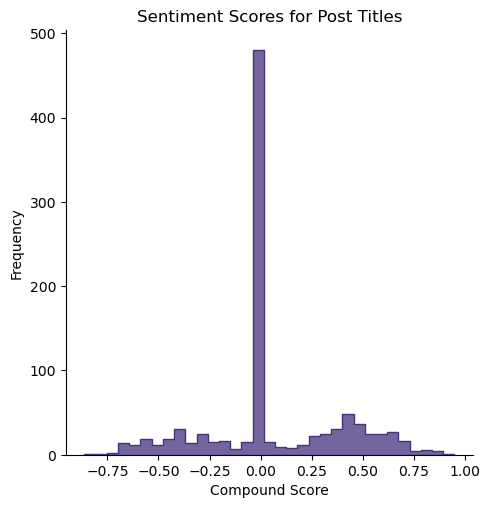

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.set_palette("viridis")
# Plot histogram of compound sentiment scores with colored bars


sns.displot(posts_df['compound'], color= palette, element="step")


plt.title('Sentiment Scores for Post Titles')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


([<matplotlib.patches.Wedge at 0x7fef728e6670>,
 [Text(-0.4028914170941316, 1.0235616767112192, 'Negative'),
  Text(-0.2068787492173909, -1.0803708544394597, 'Neutral'),
  Text(0.5882047347509265, 0.9295241739818241, 'Positive')],
 [Text(-0.21975895477861723, 0.5583063691152105, '11.9%'),
  Text(-0.11284295411857685, -0.5892931933306143, '70.1%'),
  Text(0.3208389462277781, 0.5070131858082676, '18.0%')])

(-1.114369082442183,
 1.115450509758444,
 -1.1177338748605896,
 1.1008445073667823)

Text(0.5, 1.0, 'Sentiment Distribution for Post Titles')

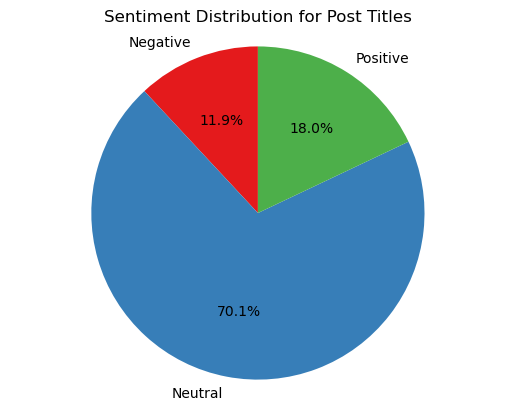

In [46]:
# Create data for the pie chart
labels = ['Negative', 'Neutral', 'Positive']
# average sentiment
sizes = [posts_df['neg'].mean(), posts_df['neu'].mean(), posts_df['pos'].mean()]

color = palette = sns.set_palette("Set1")

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = palette)
ax1.axis('equal')

# Add a title
plt.title('Sentiment Distribution for Post Titles')

# Show the chart
plt.show()


Text(0.5, 1.0, 'Sentiment Scores for Post Comments')

Text(0.5, 9.444444444444438, 'Compound Score')

Text(-12.805555555555555, 0.5, 'Frequency')

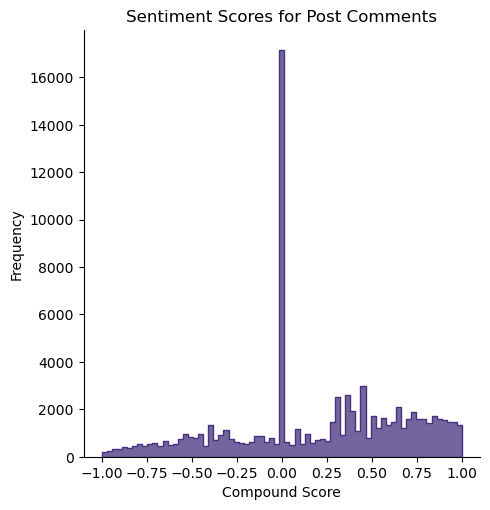

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.set_palette("viridis")
# Plot histogram of compound sentiment scores with colored bars


sns.displot(comments_posts_df['compound'], color= palette, element="step")


plt.title('Sentiment Scores for Post Comments')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


([<matplotlib.patches.Wedge at 0x7fef73ef5af0>,
 [Text(-0.36718497571611025, 1.036906550084606, 'Negative'),
  Text(-0.3147064167129778, -1.0540208115970375, 'Neutral'),
  Text(0.6484925424615101, 0.8885141655436939, 'Positive')],
 [Text(-0.2002827140269692, 0.5655853909552396, '10.8%'),
  Text(-0.17165804547980604, -0.5749204426892932, '69.1%'),
  Text(0.35372320497900545, 0.4846440902965602, '20.1%')])

(-1.1178750191287623,
 1.1165742136789116,
 -1.1144438531561742,
 1.1006878025312463)

Text(0.5, 1.0, 'Sentiment Distribution for Post Comments')

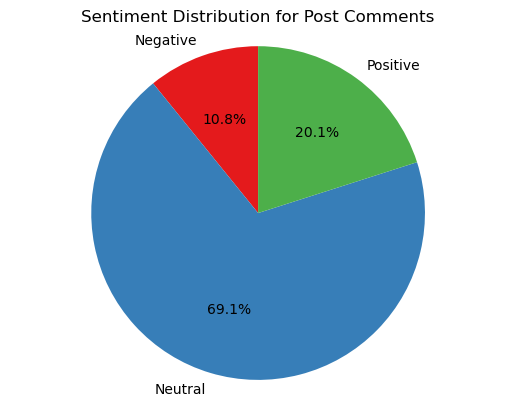

In [48]:
# Create data for the pie chart
labels = ['Negative', 'Neutral', 'Positive']
# average sentiment
sizes = [comments_posts_df['neg'].mean(), comments_posts_df['neu'].mean(), comments_posts_df['pos'].mean()]

color = palette = sns.set_palette("Set1")

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = palette)
ax1.axis('equal')

# Add a title
plt.title('Sentiment Distribution for Post Comments')

# Show the chart
plt.show()


In [49]:
# The compound score is a normalized, weighted composite score that ranges from -1 (extremely negative) to +1 (extremely positive), 
# where scores greater than 0.05 are generally considered positive 
# and scores less than -0.05 are generally considered negative.
# so we can define a function that takes in the compound score and returns a label based on a certain threshold. 


def get_sentiment_label(compound_score, threshold=0.05):
    if compound_score >= threshold:
        return 'pos'
    elif compound_score <= -threshold:
        return 'neg'
    else:
        return 'neu'

    
posts_df['sentiment_label'] = posts_df['compound'].apply(get_sentiment_label)
posts_df.head(5)

comments_posts_df['sentiment_label'] = comments_posts_df['compound'].apply(get_sentiment_label)
comments_posts_df.head(5)


post_id subreddit   created_utc selftext  \
0   zj2aeu   ChatGPT  1.670782e+09      NaN   
1  11yau45   ChatGPT  1.679470e+09      NaN   
2  11sz0p5   ChatGPT  1.678984e+09      NaN   
3  11p4zg6   ChatGPT  1.678595e+09      NaN   
4  122zfa6   ChatGPT  1.679864e+09      NaN   

                              post_url  \
0  https://i.redd.it/nytnro758b5a1.png   
1  https://i.redd.it/6hgfcsy2bapa1.jpg   
2  https://i.redd.it/iq1ukmep66oa1.png   
3  https://i.redd.it/cs0efxmsz9na1.png   
4  https://i.redd.it/o7hy9apod5qa1.png   

                                          post_title link_falir_text  score  \
0  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1                               wow it is so smart 💀           Fake   19179   
2                                                >:(          Funny   16007   
3                               Truly pure of heart.          Funny   14031   
4     Rap battling ChatGPT is my new favorite sport.          Funny   13318   

   num_comments  upvote_ratio  ... created_day  created_hour  created_week  \
0           300          1.00  ...          11            21            49   
1           662          0.92  ...          22            10            12   
2           199          0.99  ...          16            20            11   
3           326          0.96  ...          12             7            10   
4           358          0.98  ...          27             0            13   

                        cleaned_titles  \
0  mustsee moment something shock core   
1                                smart   
2                                        
3                     truly pure heart   
4                battle favorite sport   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  0.606  0.000   
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  0.000  0.000  1.000   
2  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  0.000  0.000  0.000   
3  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...  0.000  0.408  0.592   
4  {'neg': 0.394, 'neu': 0.152, 'pos': 0.455, 'co...  0.394  0.152  0.455   

   compound  sentiment_label  
0   -0.3818              neg  
1    0.4019              pos  
2    0.0000              neu  
3    0.4404              pos  
4    0.1027              pos  

[5 rows x 23 columns]

post_id subreddit   created_utc selftext  \
0  zj2aeu   ChatGPT  1.670782e+09      NaN   
1  zj2aeu   ChatGPT  1.670782e+09      NaN   
2  zj2aeu   ChatGPT  1.670782e+09      NaN   
4  zj2aeu   ChatGPT  1.670782e+09      NaN   
5  zj2aeu   ChatGPT  1.670782e+09      NaN   

                              post_url  \
0  https://i.redd.it/nytnro758b5a1.png   
1  https://i.redd.it/nytnro758b5a1.png   
2  https://i.redd.it/nytnro758b5a1.png   
4  https://i.redd.it/nytnro758b5a1.png   
5  https://i.redd.it/nytnro758b5a1.png   

                                          post_title link_falir_text  score  \
0  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
1  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
2  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
4  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   
5  10/10, must-see moment! ChatGPT just did somet...             NaN  20586   

   num_comments  upvote_ratio  ...  \
0           300           1.0  ...   
1           300           1.0  ...   
2           300           1.0  ...   
4           300           1.0  ...   
5           300           1.0  ...   

                                             comment  word_count  length  \
0  I've been shocked for days now, I don't need c...          10      55   
1   \r\n\r\nI am so angry right now. I just waste...         229    1212   
2  chatgpt karma whoring is here folks! just when...          23     131   
4  Certified 10/10, must-see moment. It really di...          12      68   
5  People on Reddit seek the karma and the fame,\...         115     687   

                                    cleaned_comments  \
0                     shock days dont need clickbait   
1  angry right waste time read post clickbait tit...   
2  karma whore folks think stream think bullshit ...   
4  people reddit seek karma fameusing chatcpt ass...   
5  discover basic functionality language model co...   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  0.606  0.000   
1  {'neg': 0.38, 'neu': 0.479, 'pos': 0.141, 'com...  0.380  0.479  0.141   
2  {'neg': 0.536, 'neu': 0.464, 'pos': 0.0, 'comp...  0.536  0.464  0.000   
4  {'neg': 0.084, 'neu': 0.81, 'pos': 0.106, 'com...  0.084  0.810  0.106   
5  {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...  0.000  0.570  0.430   

   compound sentiment_label  
0   -0.3818             neg  
1   -0.9719             neg  
2   -0.8442             neg  
4    0.1027             pos  
5    0.7783             pos  

[5 rows x 26 columns]

<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'neg')

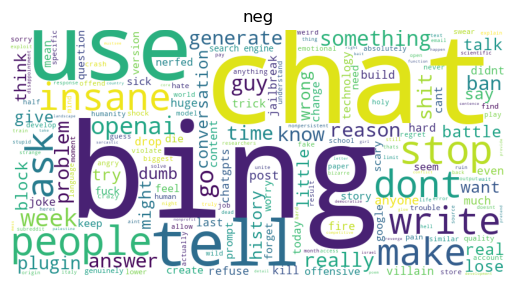

<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'neu')

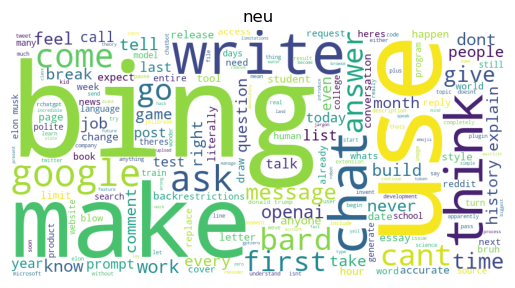

<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'pos')

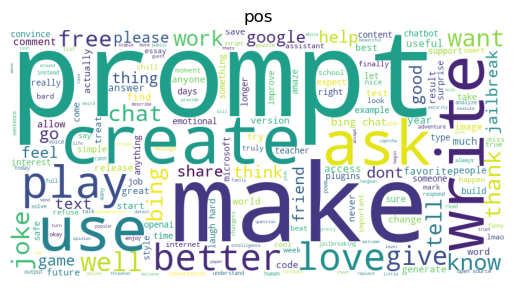

In [50]:
# create a word cloud to visualize the most common words associated with each sentiment label. 
# To do this, we can group the data by sentiment label and concatenate the titles in each group into a single string. 
# Then, we can use a word cloud library like WordCloud to create a visual representation of the most common words in each group.

from wordcloud import WordCloud

# Group the data by sentiment label and concatenate the titles in each group
sentiment_text = posts_df.groupby('sentiment_label')['cleaned_titles'].apply(lambda x: ' '.join(x))

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white')

# Generate a word cloud for each sentiment label group
for label, text in sentiment_text.items():
    plt.figure()
    plt.imshow(wc.generate(text))
    plt.axis('off')
    plt.title(label)
    plt.show()


<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'neg')

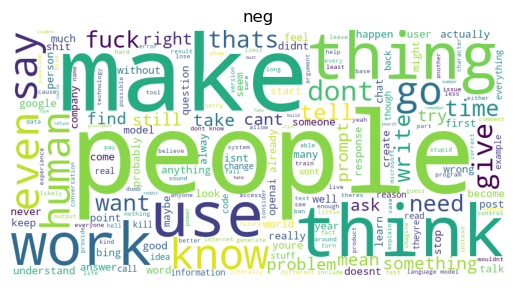

<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'neu')

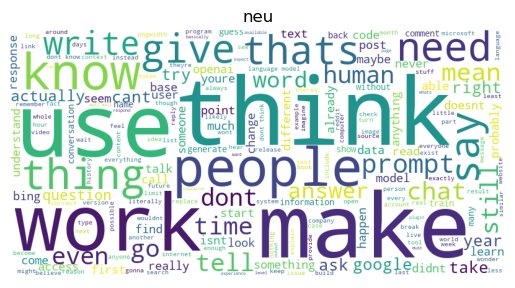

<Figure size 640x480 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'pos')

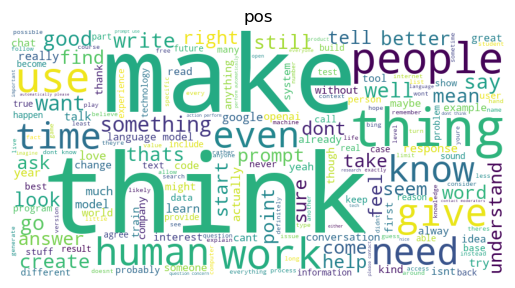

In [51]:
# create a word cloud to visualize the most common words associated with each sentiment label. 
# To do this, we can group the data by sentiment label and concatenate the titles in each group into a single string. 
# Then, we can use a word cloud library like WordCloud to create a visual representation of the most common words in each group.

from wordcloud import WordCloud

# Group the data by sentiment label and concatenate the titles in each group
sentiment_text2 = comments_posts_df.groupby('sentiment_label')['cleaned_comments'].apply(lambda x: ' '.join(x))

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white')

# Generate a word cloud for each sentiment label group
for label, text in sentiment_text2.items():
    plt.figure()
    plt.imshow(wc.generate(text))
    plt.axis('off')
    plt.title(label)
    plt.show()


#### Sentiment Trend of Reddit Posts 

(<Figure size 1500x600 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='created_date', ylabel='Count'>

Text(0.5, 1.0, 'Sentiment Trend of ChatGPT Reddit Posts from Dec 2022 to April 2023')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Count')

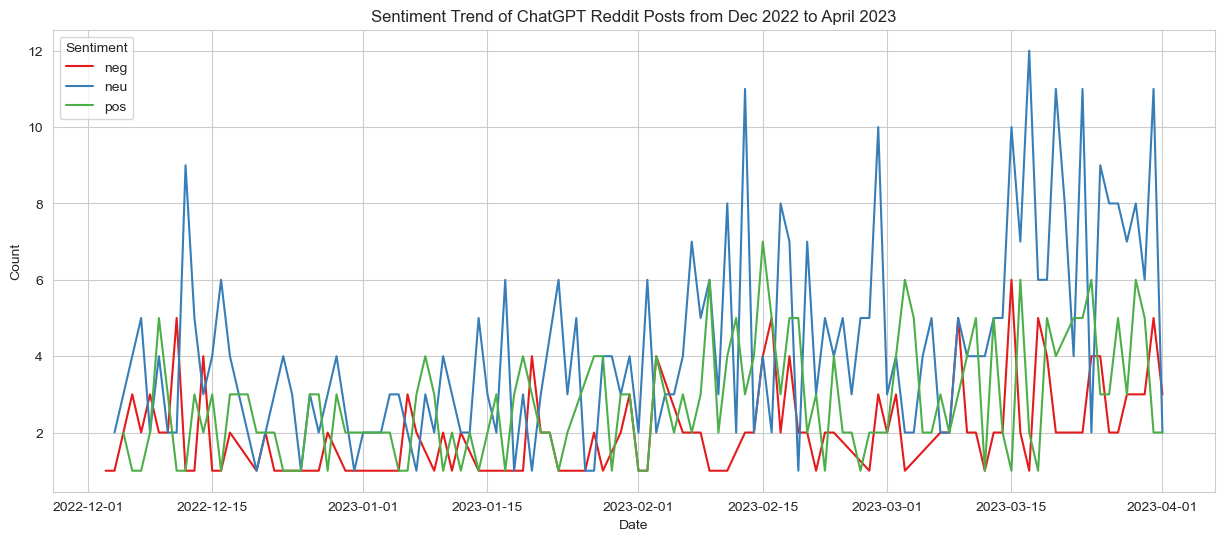

In [72]:
# Sentiment with time
#create a dataframe with sentiment count for each day
sentiment_count = posts_df.resample('D', on='created_date')['sentiment_label'].value_counts().unstack()
sentiment_count.reset_index(inplace=True)
sentiment_count = sentiment_count.melt('created_date', var_name='Sentiment', value_name='Count')
plt.subplots(1,1,figsize=(15,6))
sns.lineplot(data=sentiment_count, hue='Sentiment', y='Count', x='created_date')
plt.title('Sentiment Trend of ChatGPT Reddit Posts from Dec 2022 to April 2023')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [99]:
posts_df.to_csv('Titles_VaderSentiment.csv', index=False)
comments_posts_df.to_csv('Comments_VaderSentiment.csv', index=False)

### bertweet-sentiment-analysis (transformers)

In [ ]:
# !pip install transformers

In [ ]:
# posts_df = pd.read_csv('Titles_VaderSentiment.csv')
# posts_df

In [ ]:
# posts_df["cleaned_titles"] = posts_df["cleaned_titles"].astype(str)
# titles = posts_df['cleaned_titles'].to_list()
# print(titles[0])

In [ ]:
# from transformers import pipeline
# specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
# results = specific_model(titles)

# # Extract the sentiment label and score for each title from the results
# sentiment_labels = [result['label'] for result in results]
# sentiment_scores = [result['score'] for result in results]

# # Add the sentiment label and score columns to the dataframe
# posts_df['bertweet_sentiment_labels'] = sentiment_labels
# posts_df['bertweet_sentiment_score'] = sentiment_scores

# # Print the first five rows of the updated dataframe
# print(posts_df.head(5))


#### 📊 Visulization

In [ ]:
# import matplotlib.pyplot as plt

# # Group the data by sentiment label and count the number of titles in each group
# sentiment_counts = posts_df.groupby('bertweet_sentiment_labels').size()

# # Create a bar chart
# plt.bar(sentiment_counts.index, sentiment_counts.values, color=['r', 'b', 'g'])

# # Add labels and title
# plt.xlabel('Sentiment Label')
# plt.ylabel('Count')
# plt.title('Distribution of Sentiments for Post Titles')

# # Show the plot
# plt.show()


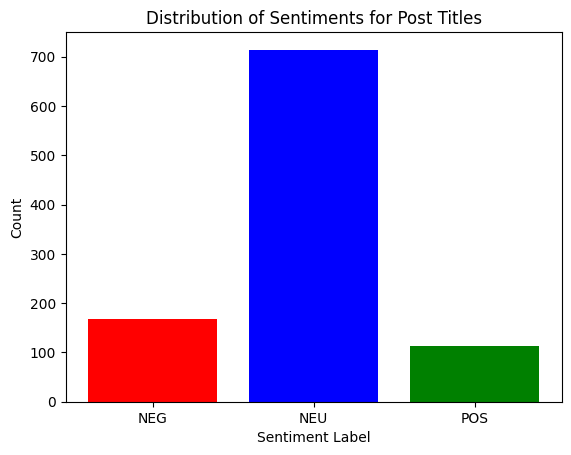

In [ ]:
# # Count the number of titles in each sentiment label group
# sentiment_counts = posts_df.groupby('bertweet_sentiment_labels').size()

# # Create a pie chart
# plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')

# # Add title
# plt.title('Proportion of Sentiments for Post Titles')

# # Show the plot
# plt.show()


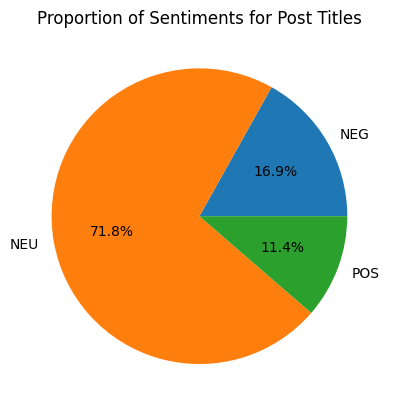